# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [67]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,  IsolationForest, RandomForestClassifier 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [20]:
data = pd.read_csv("motorbike_ambulance_calls.csv")

In [21]:
print(data.head())

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


In [23]:
print(data.describe())

            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.

In [24]:
shape = data.shape
print("Shape = {}".format(shape))

Shape = (17379, 15)


In [25]:
size = data.size
 
print("Size = {}".format(size))

Size = 260685


In [26]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [71]:
data.drop_duplicates()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,anomaly
0,1,2011-01-01,0,0,1,0,0,6,0,0,0.24,0.81,0.0000,16,0
1,2,2011-01-01,0,0,1,1,0,6,0,0,0.22,0.80,0.0000,40,0
2,3,2011-01-01,0,0,1,2,0,6,0,0,0.22,0.80,0.0000,32,0
3,4,2011-01-01,0,0,1,3,0,6,0,0,0.24,0.75,0.0000,13,0
4,5,2011-01-01,0,0,1,4,0,6,0,0,0.24,0.75,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,0,1,12,19,0,1,1,1,0.26,0.60,0.1642,119,0
17375,17376,2012-12-31,0,1,12,20,0,1,1,1,0.26,0.60,0.1642,89,0
17376,17377,2012-12-31,0,1,12,21,0,1,1,0,0.26,0.60,0.1642,90,0
17377,17378,2012-12-31,0,1,12,22,0,1,1,0,0.26,0.56,0.1343,61,0


In [27]:
data = data.drop(columns=['atemp'])
data.to_csv('modified_motorbike_ambulance_calls.csv', index=False)

print(data.head())

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   

   weathersit  temp   hum  windspeed  cnt  
0           1  0.24  0.81        0.0   16  
1           1  0.22  0.80        0.0   40  
2           1  0.22  0.80        0.0   32  
3           1  0.24  0.75        0.0   13  
4           1  0.24  0.75        0.0    1  


In [28]:
data["season"].unique()

data["date"] = pd.to_datetime(data["date"])
data["date"]

/var/folders/pk/_9jfkx9s3_93slg6pbvr54qr0000gn/T/ipykernel_55019/3971797791.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(data["date"])


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [72]:
def Season(date):
    
    if date.month in [12, 1, 2]:
        return 1
    elif date.month in [3, 4, 5]:
        return 2
    elif date.month in [6, 7, 8]:
        return 3
    elif date.month in [9, 10, 11]:
        return 3    

data["season"] = data["date"].apply(Season)

data.to_csv('modified_motorbike_ambulance_calls.csv', index=False)

data.sample(15)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,anomaly
14232,14233,2012-08-21,3,1,8,5,0,2,1,0,0.56,0.83,0.0896,34,0
13684,13685,2012-07-29,3,1,7,9,0,0,0,0,0.72,0.62,0.2537,226,0
15040,15041,2012-09-23,3,1,9,21,0,0,0,1,0.52,0.48,0.1045,196,0
10365,10366,2012-03-13,2,1,3,0,0,2,1,1,0.56,0.52,0.1940,26,0
2996,2997,2011-05-09,2,0,5,18,0,1,1,0,0.62,0.38,0.2985,524,0
8343,8344,2011-12-19,1,0,12,7,0,1,1,0,0.18,0.74,0.1045,191,0
12668,12669,2012-06-17,3,1,6,1,0,0,0,0,0.56,0.60,0.1642,88,0
13736,13737,2012-07-31,3,1,7,13,0,2,1,0,0.80,0.55,0.2836,288,0
12242,12243,2012-05-30,2,1,5,7,0,3,1,2,0.60,0.78,0.1940,483,0
7680,7681,2011-11-21,3,0,11,15,0,1,1,2,0.44,0.94,0.2239,108,0


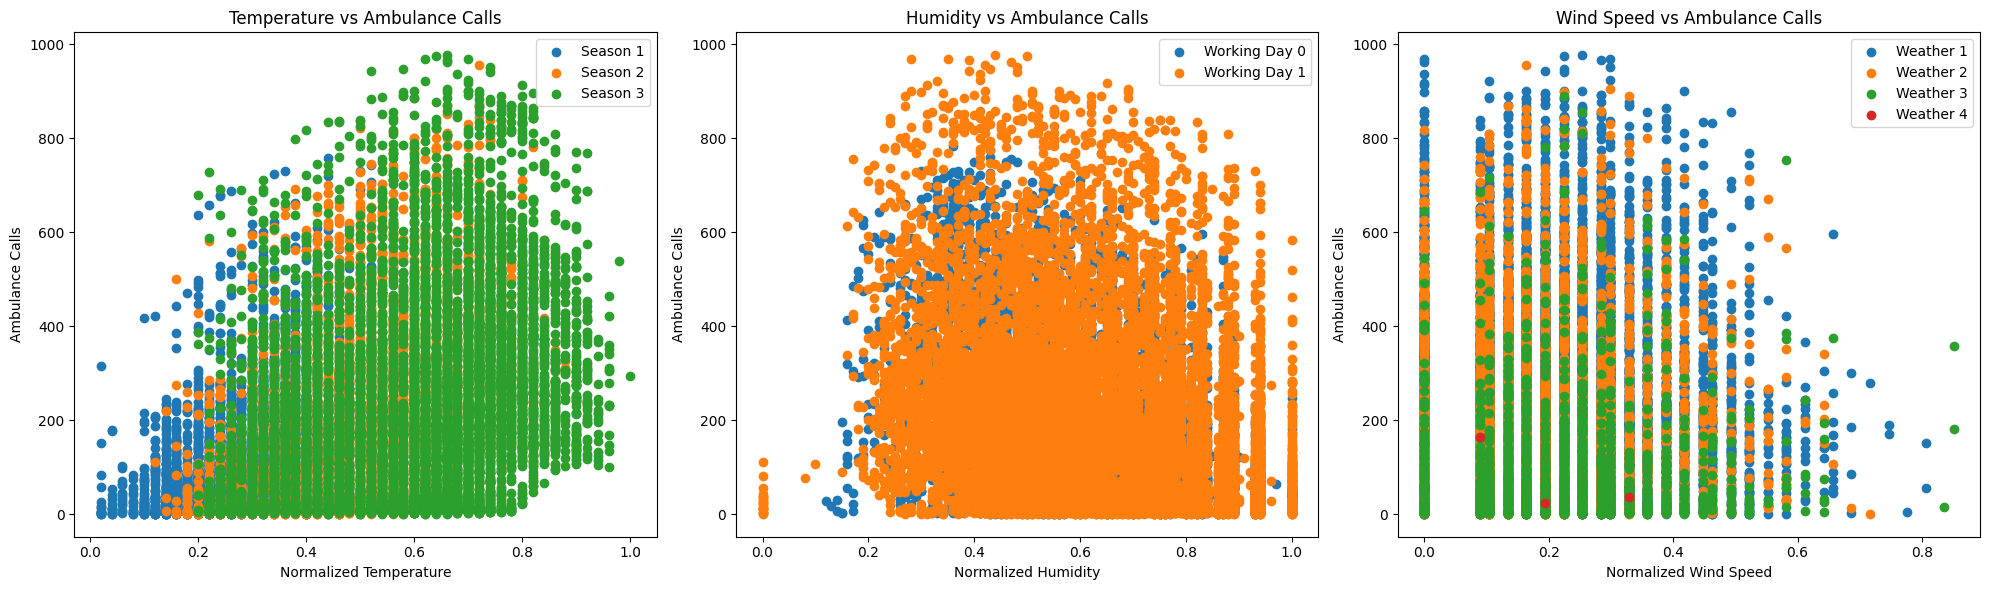

In [30]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1) 
for season in data['season'].unique():
    season_data = data[data['season'] == season]
    plt.scatter(season_data['temp'], season_data['cnt'], label=f'Season {season}')
plt.title('Temperature vs Ambulance Calls')
plt.xlabel('Normalized Temperature')
plt.ylabel('Ambulance Calls')
plt.legend()

plt.subplot(1, 3, 2)  
for workingday in data['workingday'].unique():
    workingday_data = data[data['workingday'] == workingday]
    plt.scatter(workingday_data['hum'], workingday_data['cnt'], label=f'Working Day {workingday}')
plt.title('Humidity vs Ambulance Calls')
plt.xlabel('Normalized Humidity')
plt.ylabel('Ambulance Calls')
plt.legend()

plt.subplot(1, 3, 3)  
for weathersit in data['weathersit'].unique():
    weathersit_data = data[data['weathersit'] == weathersit]
    plt.scatter(weathersit_data['windspeed'], weathersit_data['cnt'], label=f'Weather {weathersit}')
plt.title('Wind Speed vs Ambulance Calls')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Ambulance Calls')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
features = data[['temp', 'hum', 'windspeed', 'weathersit', 'season', 'holiday', 'weekday', 'workingday', 'mnth', 'hr']]
target = data['cnt']

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (17379, 10)
Target shape: (17379,)


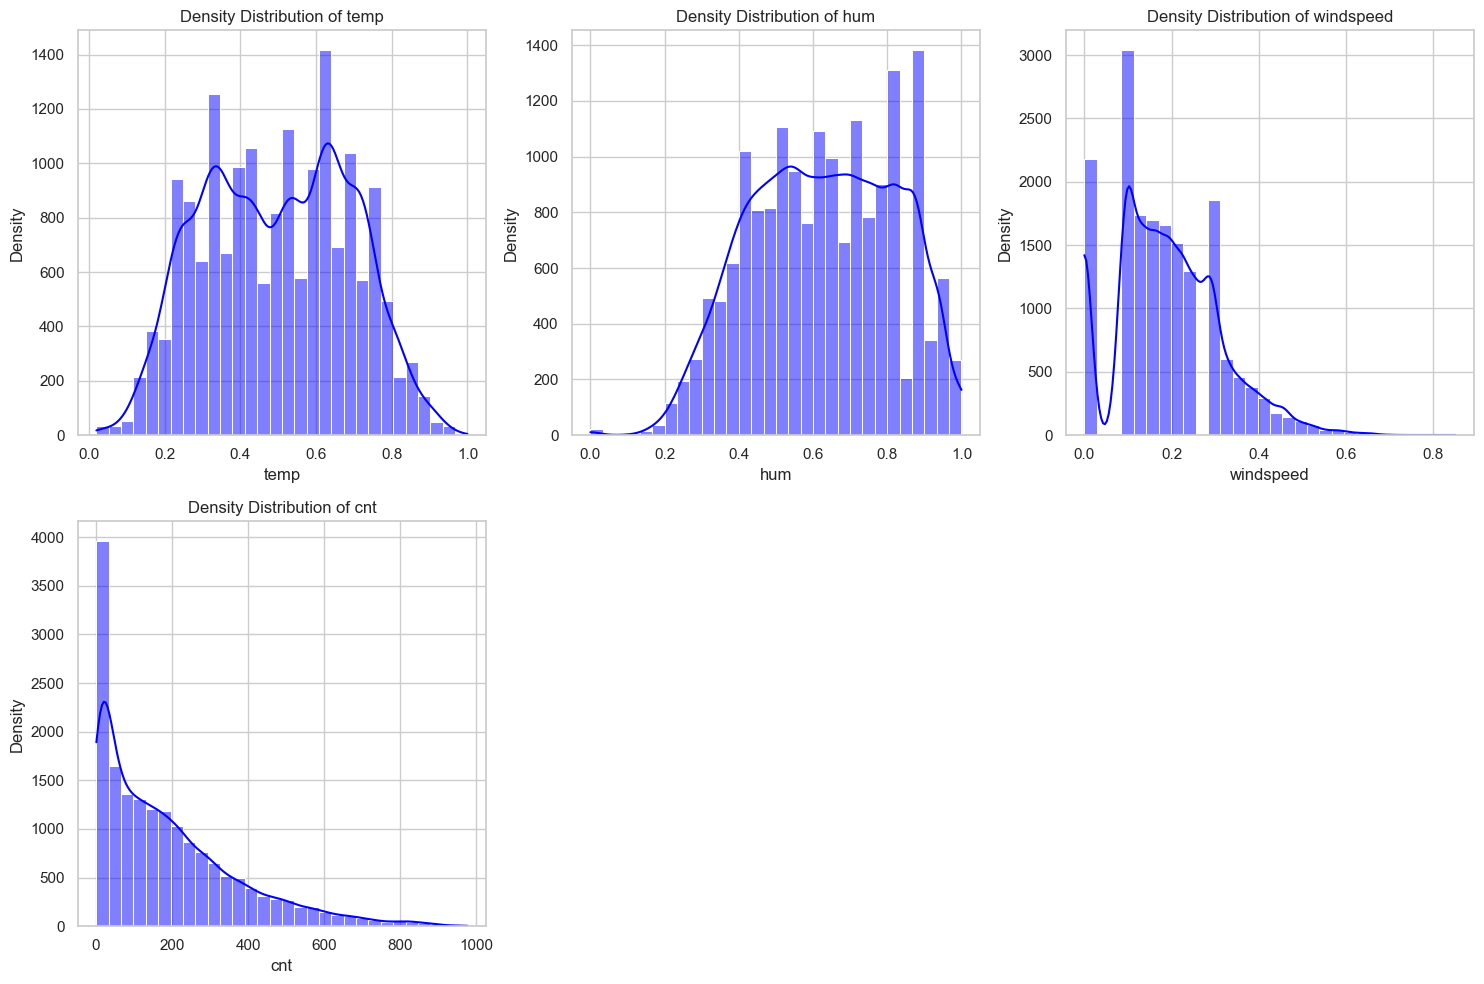

In [32]:
sns.set(style="whitegrid")

continuous_features = ['temp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Density Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

<Axes: xlabel='cnt', ylabel='Density'>

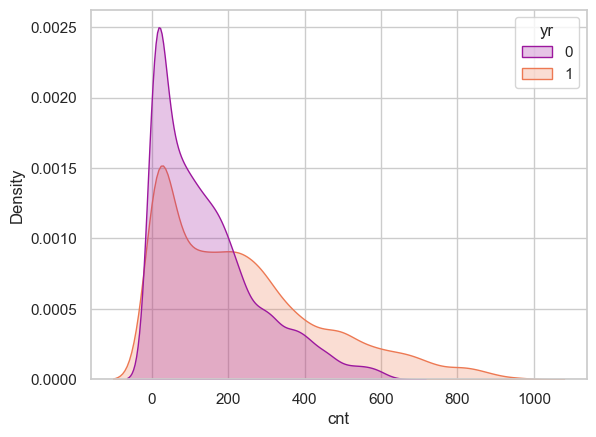

In [48]:
sns.kdeplot(data=data, x='cnt', hue='yr', palette='plasma', fill=True)

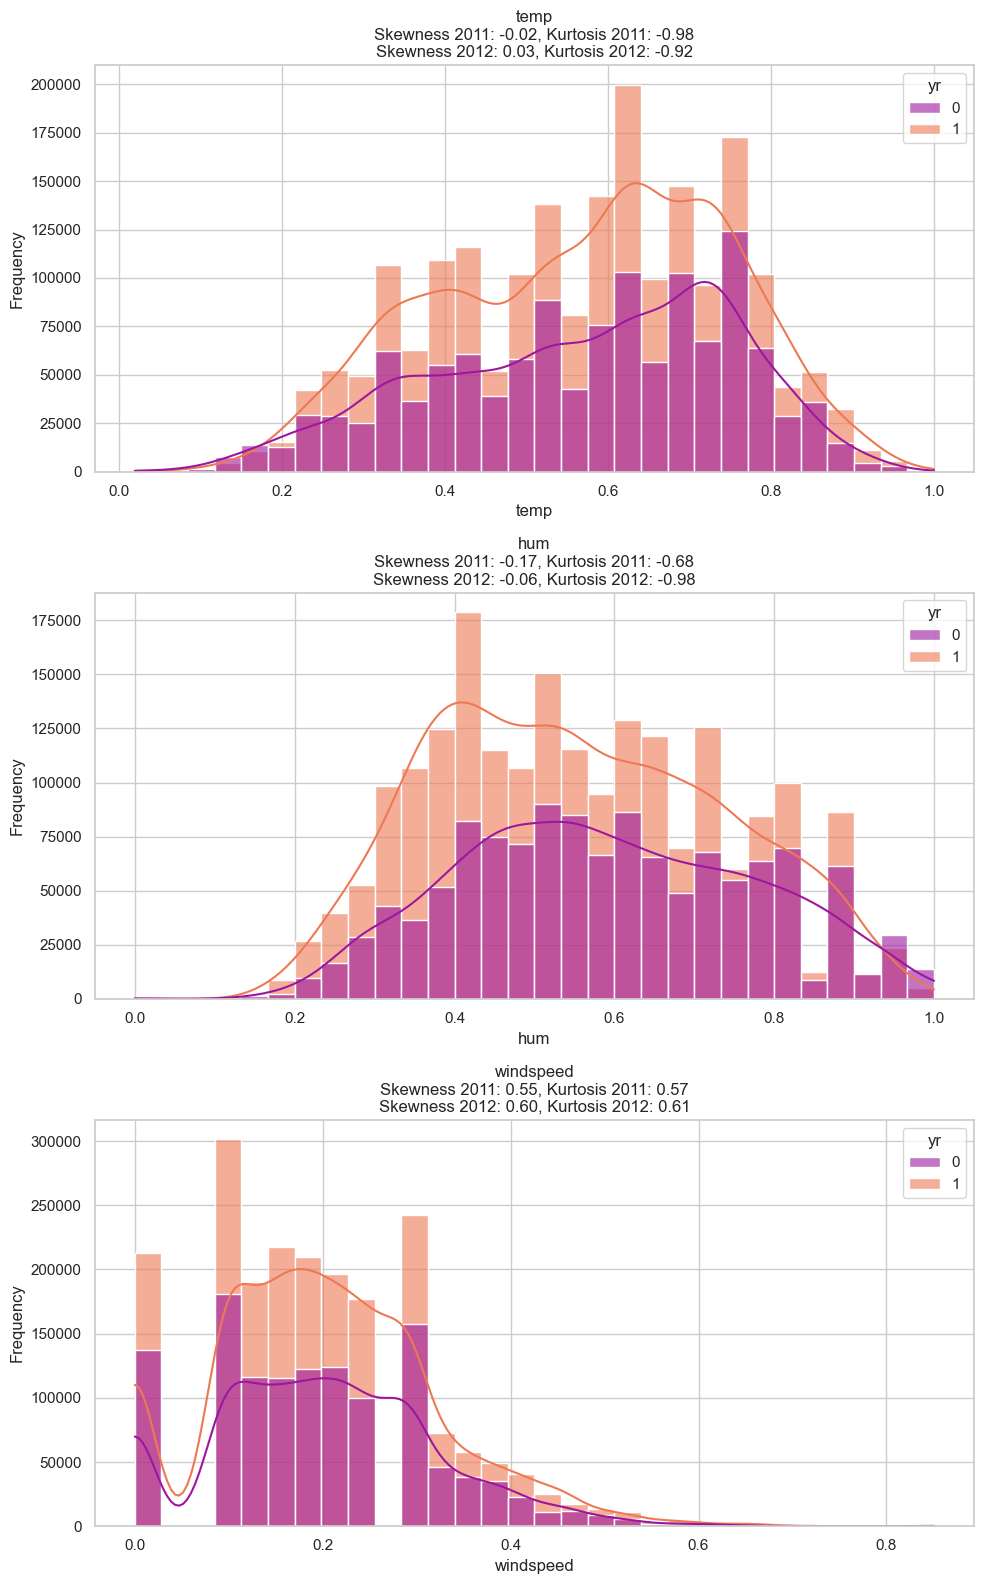

In [63]:
numerical_data = data[["temp", "hum", "windspeed"]]

_, ax = plt.subplots(3, 1, figsize=(10, 16))

for col, subplot in zip(numerical_data.columns, ax.flatten()):
    data_grouped = data.groupby('yr')[col]
    
    skewness = data_grouped.apply(lambda x: skew(x, nan_policy='omit'))
    kurtosis_vals = data_grouped.apply(lambda x: kurtosis(x, nan_policy='omit'))

    sns.histplot(data=data, x=col, kde=True, palette='plasma', weights="cnt", hue="yr", ax=subplot, bins=30, alpha=0.6)

    subplot.set_title(f"{col}\n"
                      f"Skewness 2011: {skewness[0]:.2f}, Kurtosis 2011: {kurtosis_vals[0]:.2f}\n"
                      f"Skewness 2012: {skewness[1]:.2f}, Kurtosis 2012: {kurtosis_vals[1]:.2f}")
    
    subplot.set_xlabel(col)
    subplot.set_ylabel('Frequency')

plt.tight_layout() 

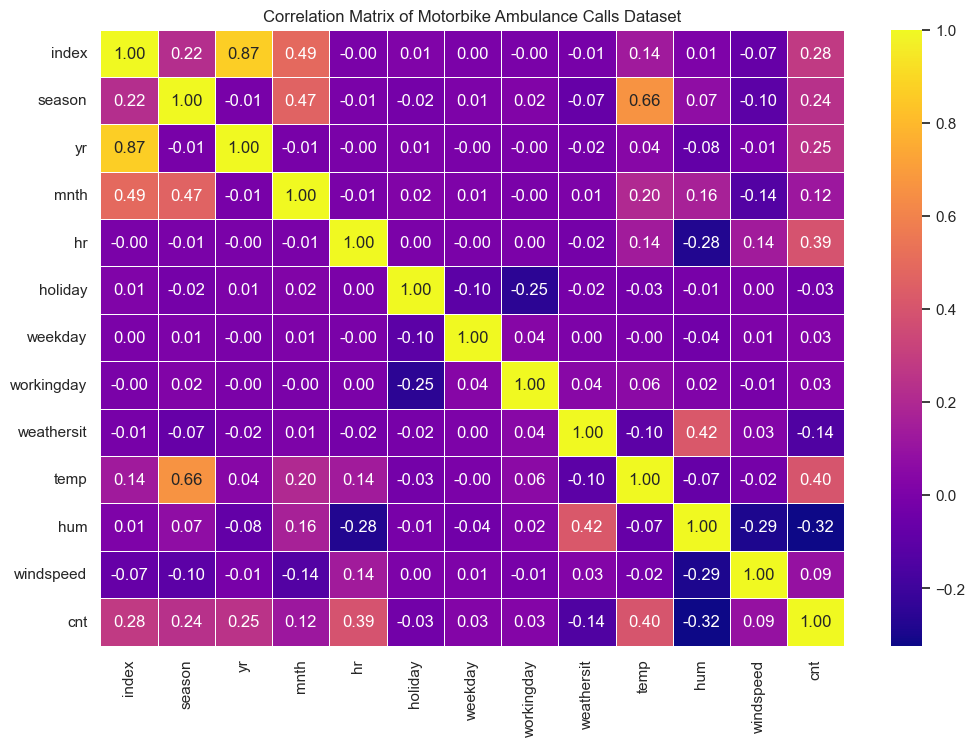

In [33]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Motorbike Ambulance Calls Dataset')
plt.show()

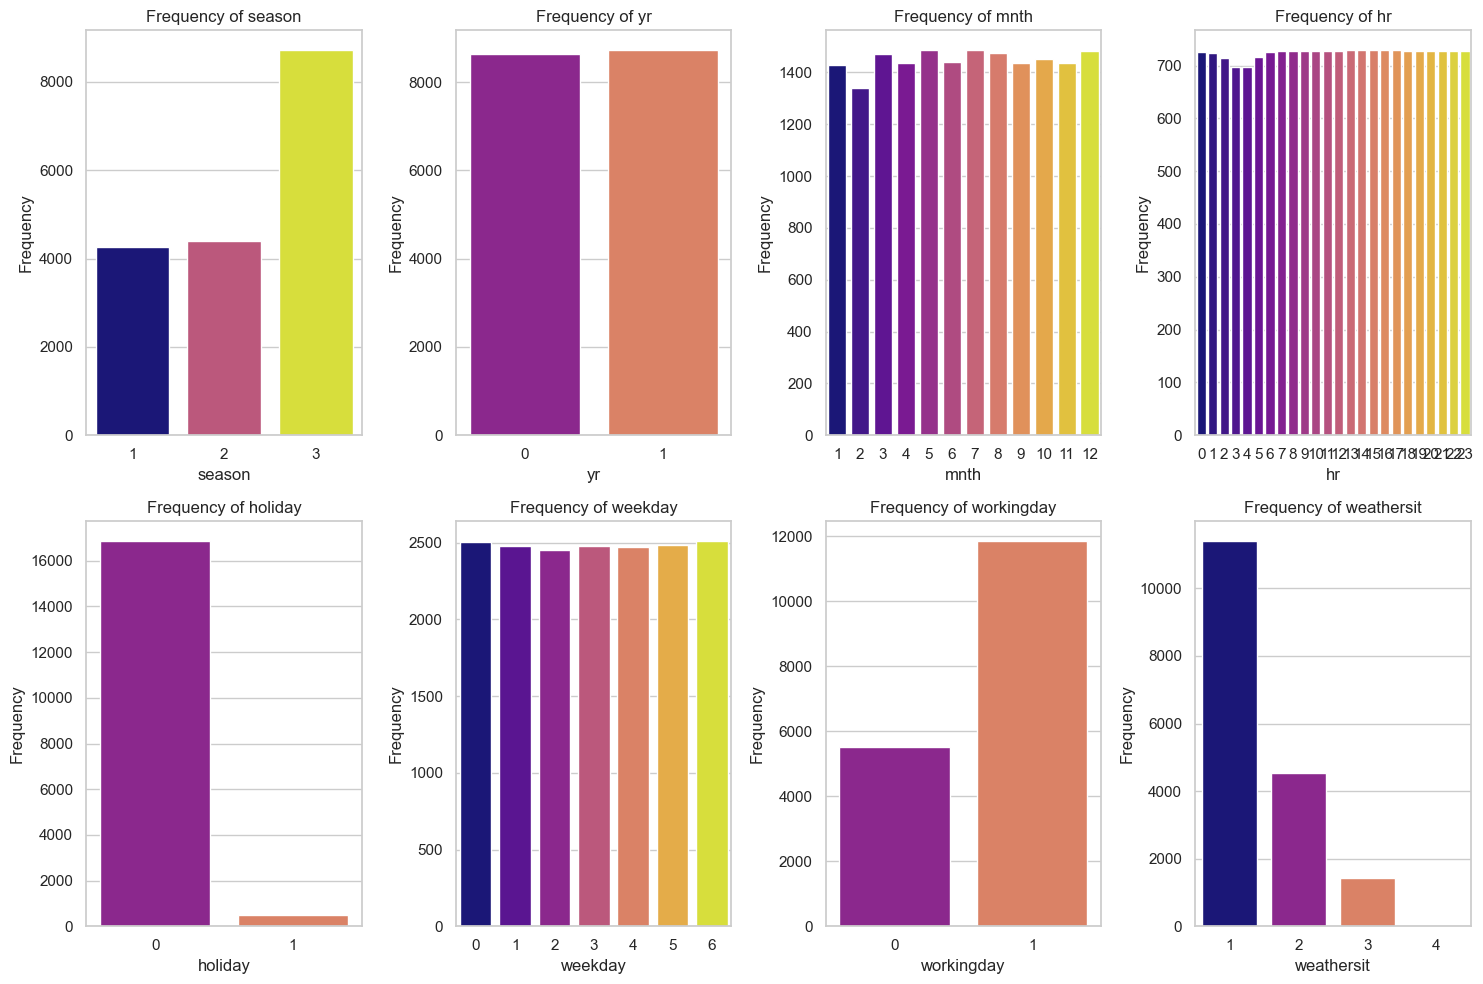

In [34]:
sns.set(style="whitegrid")
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=data,  x=feature, hue=feature, palette='plasma', legend=False) 
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


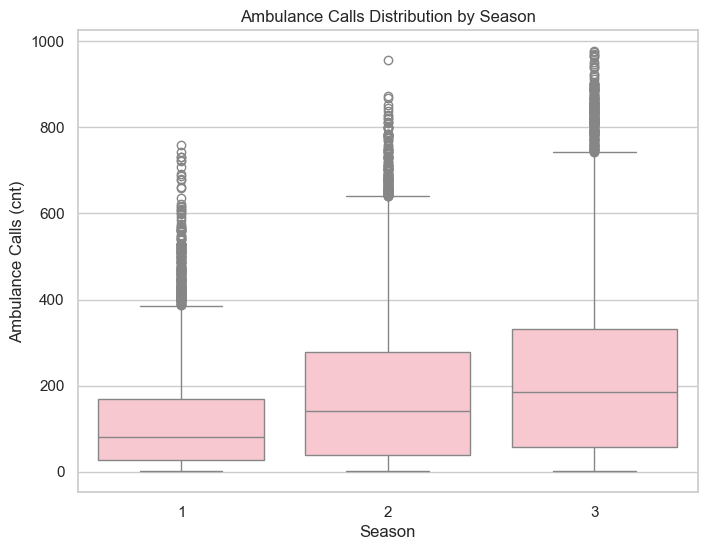

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="season", y="cnt", color="pink")
plt.title("Ambulance Calls Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Ambulance Calls (cnt)")
plt.show()

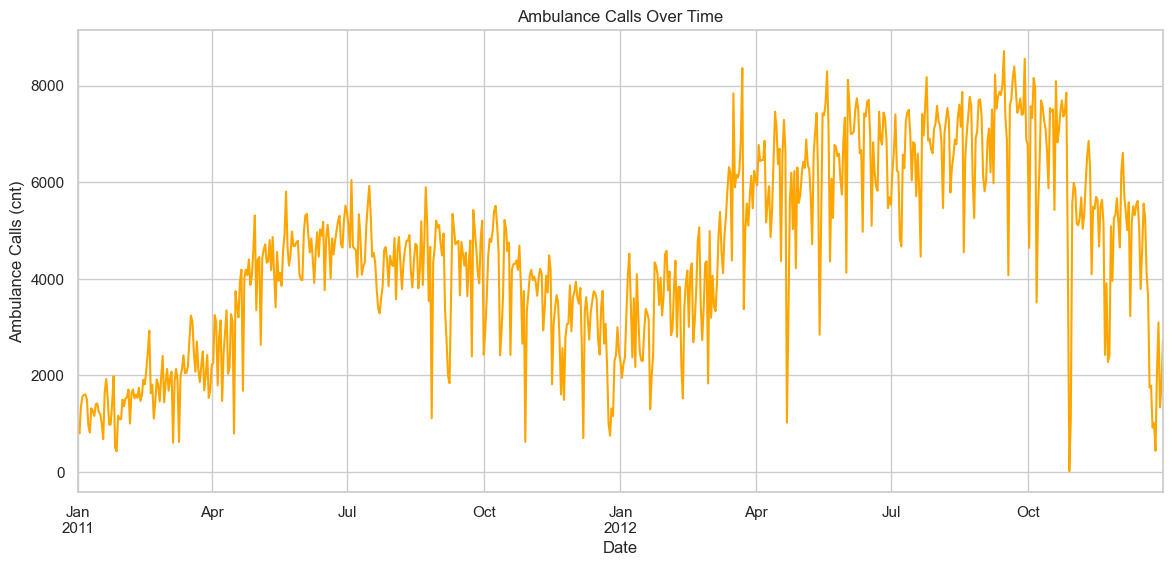

In [36]:
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')

time_series = data.groupby("date")["cnt"].sum()

plt.figure(figsize=(14, 6))
time_series.plot(color='orange')
plt.title("Ambulance Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Ambulance Calls (cnt)")
plt.show()

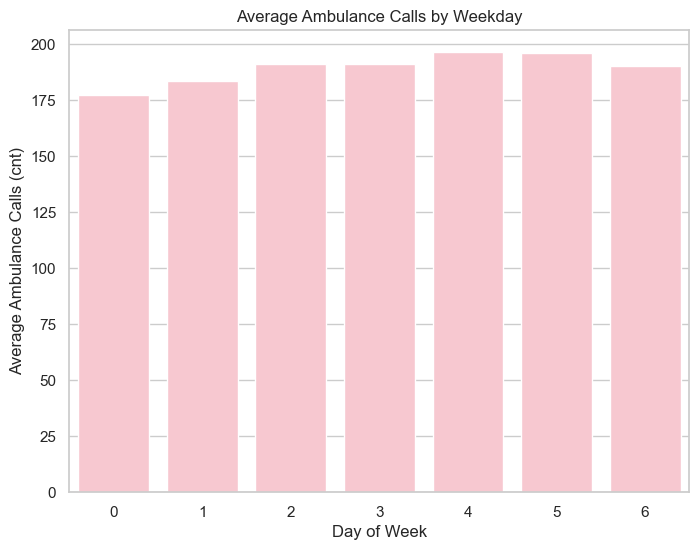

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="weekday", y="cnt", color='pink', errorbar=None)
plt.title("Average Ambulance Calls by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Ambulance Calls (cnt)")
plt.show()

In [46]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

z_scores = np.abs(zscore(numeric_df))

threshold = 3

anomalies = (z_scores > threshold).any(axis=1)

data['anomaly'] = anomalies.astype(int) 

anomalous_data = data[data['anomaly'] == 1]

anomalous_data.to_csv('anomalies.csv', index=False)

print("Anomalies detected and saved to 'anomalies.csv'.")

Anomalies detected and saved to 'anomalies.csv'.


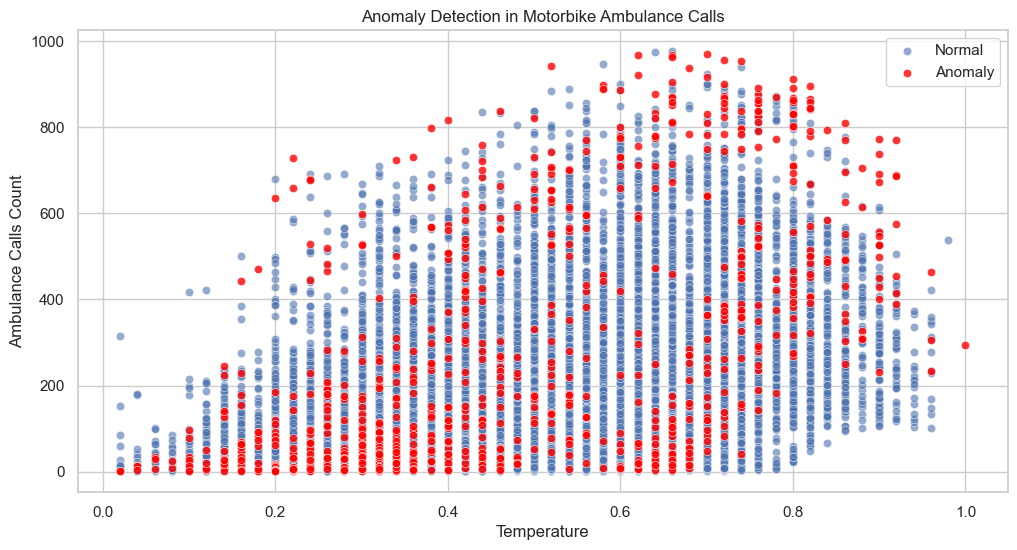

In [45]:
data['holiday'] = data['holiday'].astype(int)
data['workingday'] = data['workingday'].astype(int)

label_encoder = LabelEncoder()
data['season'] = label_encoder.fit_transform(data['season'].astype(str)) 
data['weathersit'] = label_encoder.fit_transform(data['weathersit'].astype(str)) 

features = ['temp', 'hum', 'windspeed', 'cnt', 'hr', 'season', 'holiday']
X = data[features]

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X)

anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=normal, x='temp', y='cnt', label='Normal', alpha=0.6)
sns.scatterplot(data=anomalies, x='temp', y='cnt', label='Anomaly', color='red', alpha=0.8)
plt.title("Anomaly Detection in Motorbike Ambulance Calls")
plt.xlabel("Temperature")
plt.ylabel("Ambulance Calls Count")
plt.legend()
plt.show()

anomaly_patterns = anomalies.groupby(['season', 'weathersit']).size()

anomaly_patterns_df = anomaly_patterns.reset_index(name='count')
anomaly_patterns_df.to_csv('anomaly_patterns.csv', index=False)

**Conclusion:**

1. **Head**:  
Using `data.head()`, you can view the first few rows of the dataset to quickly check the structure and contents of the data.

2. **Info**:  
`data.info()` gives a concise summary of the dataset, including the number of non-null entries and data types. This helps identify missing values and understand the structure of the data.

3. **Describe**:  
`data.describe()` provides summary statistics for the numeric columns, such as mean, standard deviation, and min/max values. This helps to understand the distribution and detect any unusual patterns or outliers in the numerical data.

4. **Drop Dublicates**:
`drop_duplicates()` ensures that the dataset contains only unique rows, removing any redundant or repeated data entries.

5. **Shape**:  
`data.shape()` returns the dimensions (rows and columns) of the dataset, which helps to confirm the size and structure of the data.

6. **Size**:  
`data.size()` gives the total number of elements in the dataset (rows * columns). It’s useful to check if the dataset is the right size and if any data is missing.

7. **Dropping the 'atemp' Column**:  
The 'atemp' column was dropped because it represents the feeling temperature, which is already captured by the 'temp' column, so it's redundant.

8. **Fixed the Order of Seasons**:  
The season values were corrected to follow the correct order (Winter, Spring, Summer, Autumn), starting with Winter instead of Spring.

9. **Scatter Plots**:  
The scatter plots show how temperature, humidity, and wind speed affect ambulance calls across different seasons, working days, and weather conditions. They help to see how these factors influence the number of calls.

10. **Histograms**:  
The histograms with density plots show the distribution of continuous features like temperature, humidity, wind speed, and ambulance calls. Temperature and wind speed are more uniform, while humidity and ambulance calls are skewed, showing different patterns in the data.

11. **Count Plots**:  
The count plots display how often each category appears in features like season, year, month, and weather conditions. They help identify patterns and any imbalances in the data for these categorical features.

12. **Boxplot**:  
The boxplot shows the distribution of ambulance calls for each season. It highlights the spread, central tendency, and any outliers, giving insights into how the number of calls varies across seasons.

13. **Line Plot**:  
The time series plot shows how ambulance calls change over time. It helps identify trends, such as peaks or drops in calls, and reveals any seasonal or temporal patterns in the data.

14. **Bar Plot**:  
The bar plot shows the average number of ambulance calls for each day of the week. It helps identify which days have more or fewer calls, showing weekly trends in ambulance demand.

15. **Isolation Forest**:  
The Isolation Forest algorithm was used to detect anomalies in ambulance calls. The scatter plot shows normal data points in blue and anomalies in red. The anomalies were grouped by season and weather situation, helping to identify unusual patterns or events in the data.


Analyzing motorbike ambulance calls helps us understand how weather and time of day affect accidents. This helps predict when calls are likely to increase, so we can be better prepared to respond quickly and efficiently.